In [1]:
#installing dependencies and setups
#full enviroment details in txt file
!pip install tensorflow opencv-python matplotlib

  Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached absl_py-2.3.0-py3-none-any.whl.metadata (2.4 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-3.1.0-py3-none-any.whl.metadata (6.4 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached keras-3.10.0-py3-none-any.whl.metadata (6.0 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached urllib3-2.4.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached certifi-2025.4.26-py3-none-any.whl.metadata (2.5 kB)
  Using cached tensorboard_data_server-0.7.

In [9]:
import tensorflow as tf 
import os  #to handle file paths
print(tf.__version__)

2.19.0


In [4]:
#running an mx 150 on a laptop surely isn't ideal, but it works yet we need to limit the GPU memory usage to avoind OOM errors
gpus = tf.config.experimental.list_physical_devices('GPU')

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gp in gpus:
    tf.config.experimental.set_memory_growth(gp, True)

[]


In [6]:
#tensorflow doesn't recognize my gpu installing CUDA and cuDNN for tensorflow 2.19.0
#https://developer.nvidia.com/cuda-12-5-0-download-archive?target_os=Windows&target_arch=x86_64&target_version=10&target_type=exe_local


In [12]:
!pip freeze > env.txt

In [13]:
conda env export --no-builds > environment.yml


Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Some of the images from our datasets may be corrupted hence we need to remove such images that may not be readable by python
# starting with a manual check of the images in the dataset we are going to remove any image sub 10kilobytes

In [15]:
import cv2
import imghdr

In [16]:
# now we want to create a variable to hold the path to our dataset
data_dir = 'data'

In [17]:
img_exts = ['jpeg', 'jpg', 'png', 'bmp',]

In [18]:
#we'll now loop into it as the manual imgs check may not be enough
for image_class in os.listdir(data_dir):                                # loop through each class folder
    for image in os.listdir(os.path.join(data_dir, image_class)):       # loop through each image in the class folder
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Issue with image data\cats\103d43_9ecc1086f64147b9afe8a9c3333b1a1amv2.jpg
Issue with image data\cats\1181276-tortoise-shell-cat-on-garden-chair-banner_990x350.jpg
Issue with image data\cats\11ff3c67-a1af-4427-8837-fa287ce2fc16.jpg
Issue with image data\cats\1200px-Cat_August_2010-4.jpg
Issue with image data\cats\202503bec-spotted-cat-breed-bengal-1024x576.jpg
Issue with image data\cats\205719.jpg
Issue with image data\cats\24644030791_e7f049a073_k-1024x683.jpg
Issue with image data\cats\2AE14CDD-1265-470C-9B15F49024186C10_source.jpg
Issue with image data\cats\2_pexels-wei-wu-413073151-30040947.png
Issue with image data\cats\71425480007-getty-images-1498838344.jpg
Issue with image data\cats\71zr9o6k7jL._AC_UF10001000_QL80_.jpg
Issue with image data\cats\75552.jpg
Issue with image data\cats\800px-Cat_07464_kalamis_safinaz.jpg
Issue with image data\cats\81PmLeqhjqL._UF10001000_QL80_.jpg
Issue with image data\cats\8536633928_62a8d4fb3b_o.0.0.1514403802.jpg
Issue with image data\cats\9CAE9C

Loading the data


In [24]:
# Tensorflow has a dataset API that allows us to create a dataset from our images
# Peculiarity from Tensorflow is that it allows us to create data pipelines that can hel us scale to large datasets
tf.data.Dataset

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [25]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('data') # this will create a dataset from our images voiding us to build classes and labels manually

Found 378 files belonging to 4 classes.


In [33]:
data_iterator = data.as_numpy_iterator() #this will create an iterator from our dataset to access a batch of images through the pipeline

In [34]:
batch = data_iterator.next()

In [42]:
#there's 2 part in this dataset, images and labels
batch[0] # this will give us the images in the batch codede as numpy arrays


array([[[[2.26000000e+02, 2.26000000e+02, 2.26000000e+02],
         [2.26000000e+02, 2.26000000e+02, 2.26000000e+02],
         [2.26000000e+02, 2.26000000e+02, 2.26000000e+02],
         ...,
         [2.26000000e+02, 2.26000000e+02, 2.26000000e+02],
         [2.26000000e+02, 2.26000000e+02, 2.26000000e+02],
         [2.26000000e+02, 2.26000000e+02, 2.26000000e+02]],

        [[2.26000000e+02, 2.26000000e+02, 2.26000000e+02],
         [2.26000000e+02, 2.26000000e+02, 2.26000000e+02],
         [2.26000000e+02, 2.26000000e+02, 2.26000000e+02],
         ...,
         [2.26000000e+02, 2.26000000e+02, 2.26000000e+02],
         [2.26000000e+02, 2.26000000e+02, 2.26000000e+02],
         [2.26000000e+02, 2.26000000e+02, 2.26000000e+02]],

        [[2.26000000e+02, 2.26000000e+02, 2.26000000e+02],
         [2.26000000e+02, 2.26000000e+02, 2.26000000e+02],
         [2.26000000e+02, 2.26000000e+02, 2.26000000e+02],
         ...,
         [2.26000000e+02, 2.26000000e+02, 2.26000000e+02],
         [

In [ ]:
batch[1] # this will give us the labels in the batch, encoded as integers


array([3, 0, 0, 3, 3, 0, 2, 2, 2, 0, 3, 1, 2, 3, 1, 1, 1, 1, 1, 1, 3, 1,
       2, 2, 3, 2, 0, 1, 1, 1, 1, 1], dtype=int32)

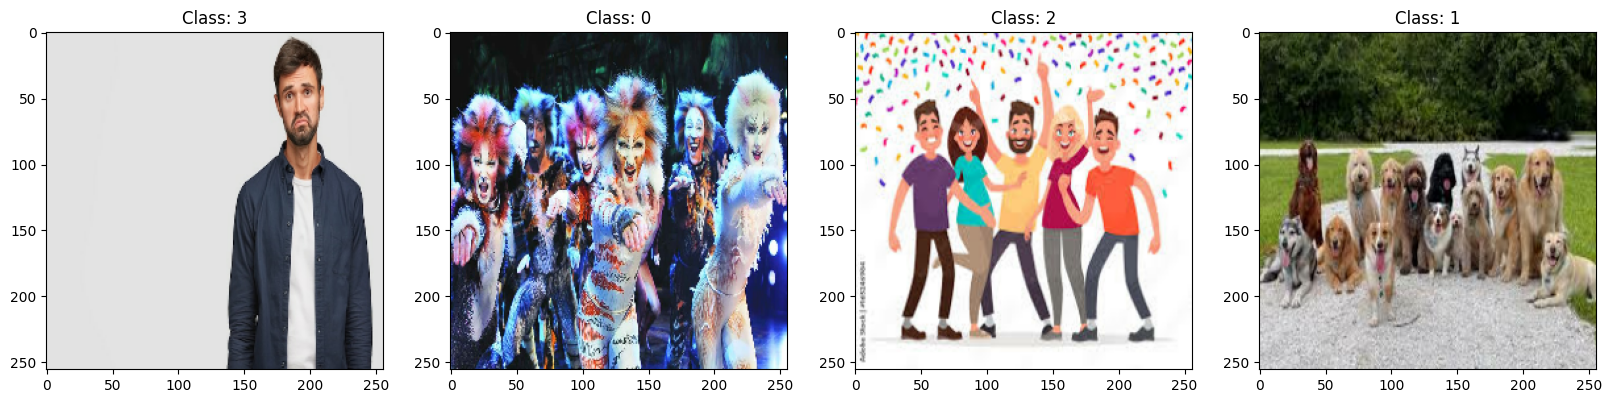

In [ ]:
# Create a figure with subplots
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))

# Keep track of the classes we've already displayed
displayed_classes = set()

# Loop through the batch to find one image per class
for img, label in zip(batch[0], batch[1]):
    if label not in displayed_classes:
        idx = len(displayed_classes)  # Use the current number of displayed classes as the subplot index
        ax[idx].imshow(img.astype(int))  # Display the image
        ax[idx].title.set_text(f"Class: {label}")  # Set the title to the class label
        displayed_classes.add(label)  # Mark this class as displayed

        if len(displayed_classes) == 4:  # as there are 4 classes
            break

Data Pre-Processing by :
- Scaling images values to binary
- splitting the data in train/test/validation partitions


In [48]:
data = data.map(lambda x,y:(x/255, y))  # this will normalize our images to be between 0 and 1

#data.map allows us to apply the scaling in  pipeline

In [49]:
data.as_numpy_iterator().next()  # this will give us the next batch of images and labels in the dataset

(array([[[[1.00000000e+00, 9.67463255e-01, 9.39093113e-01],
          [1.00000000e+00, 9.76470590e-01, 9.45098042e-01],
          [1.00000000e+00, 9.76470590e-01, 9.45098042e-01],
          ...,
          [9.95598078e-01, 9.58583355e-01, 9.25009787e-01],
          [9.92156863e-01, 9.56862748e-01, 9.24326003e-01],
          [9.92156863e-01, 9.56862748e-01, 9.25490201e-01]],
 
         [[1.00000000e+00, 9.67670739e-01, 9.39231455e-01],
          [1.00000000e+00, 9.76470590e-01, 9.45098042e-01],
          [1.00000000e+00, 9.76470590e-01, 9.45098042e-01],
          ...,
          [9.92156863e-01, 9.56862748e-01, 9.24816191e-01],
          [9.92234170e-01, 9.56785440e-01, 9.24195766e-01],
          [9.92156863e-01, 9.56862748e-01, 9.25359964e-01]],
 
         [[1.00000000e+00, 9.73713219e-01, 9.43259776e-01],
          [1.00000000e+00, 9.76470590e-01, 9.45098042e-01],
          [1.00000000e+00, 9.76470590e-01, 9.45098042e-01],
          ...,
          [9.92156863e-01, 9.56862748e-01, 9.2507